In [1]:
# Python 3
import jpeg as JPEG
import libs.ruidos as ruido
from skimage import io, transform
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import misc, ndimage


In [2]:
img = io.imread('bmp/lena_200x200.bmp')
# img= np.array(resize(img, (256, 256), mode='reflect'), dtype=np.uint8)
io.imsave('latex/fig/lena.png',img)
step = 8
loc_x = 13
loc_y = 12
io.imsave('latex/fig/lena_block.png',img[step*loc_x:step*(loc_x+1),step*loc_y:step*(loc_y+1)])
for i in range(step,200,step):
    img[:,i] = (255,0,0)
    img[i,:] = (255,0,0)
io.imsave('latex/fig/lena_blocks.png',img)
img[step*loc_x+1:step*(loc_x+1),step*loc_y+1:step*(loc_y+1),1] = 0
img[step*loc_x+1:step*(loc_x+1),step*loc_y+1:step*(loc_y+1),2] = 0
io.imsave('latex/fig/lena_blocks_rojo.png',img)



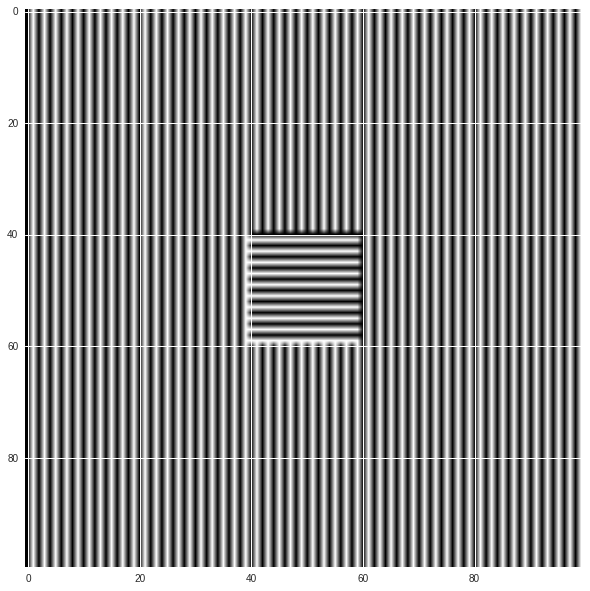

In [3]:
img = np.zeros((100,100),dtype=np.uint8)

for i in range(0,40,2):
    img[:,i] = 255
    
for i in range(60,100,2):
    img[:,i] = 255
    
for i in range(40,60,2):
    img[0:40,i] = 255
    img[60:100,i] = 255
    
for i in range(40,60,2):
    img[i,40:60] = 255

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

io.imsave('latex/fig/no_homogenea.png',img)
io.imsave('bmp/no_homogenea.bmp',img)

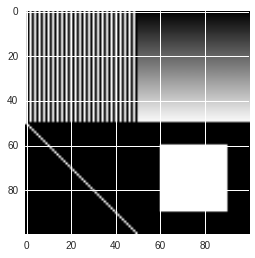

In [4]:
size = 100

img = np.zeros((size,size),dtype=np.uint8)

for i in range(0,size//2,size//50):
    img[:size//2,i] = 255

for i in range(size//2,size):
    img[i,i-size//2] = 255

for i in range(size//2,size):
    img[:size//2,i] = [255*j for j in np.arange(0,1,1/(size//2))]
    
img[size*6//10:size*9//10,size*6//10:size*9//10] = 255

plt.imshow(img,cmap='gray')
plt.show()

io.imsave('bmp/no_homogenea.bmp',img)
io.imsave('latex/fig/no_homogenea.png',img)

In [24]:
img_text = io.imread("bmp/text.bmp")
jpeg_ida_y_vuelta = lambda img,Q: JPEG.jpeg_decode(JPEG.jpeg_encode(img, Q=Q))
quality = 100
img_text_IV = jpeg_ida_y_vuelta(img_text, quality)

/home/pablo/facultad/ipdi/jpeg/jpeg.py:278: RuntimeWarning: overflow encountered in byte_scalars
  img_blocks_dctq[i][0][0] = img_blocks_dctq[i-1][0][0] + img_blocks_dctq[i][0][0]


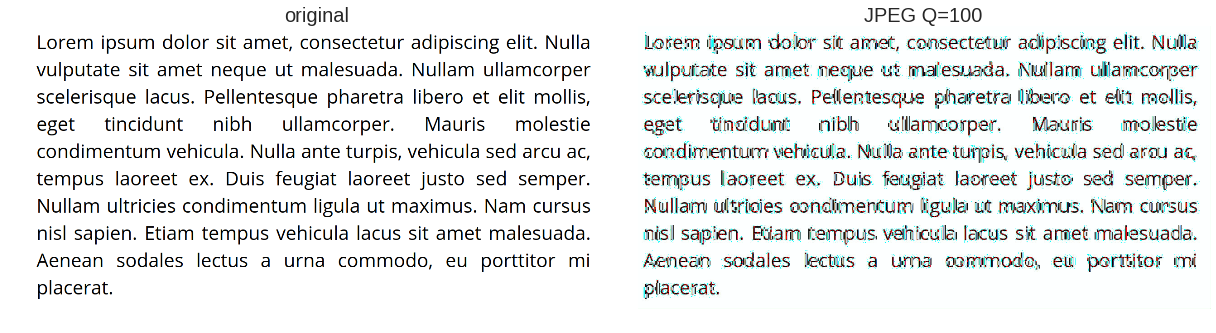

In [26]:
plt.figure(figsize=(17,10))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img_text)
plt.title("original", fontsize=20)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img_text_IV)
plt.title("JPEG Q=%s" % (quality), fontsize=20)

plt.tight_layout()
plt.show()

io.imsave("latex/fig/text_artifacts.png", img_text_IV)